In [1]:
import pandas as pd
import numpy as np
import demoji
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Comment ID,Cleaned_Comment,Vader_Score
0,UgyolGA3btmyXsv1yPF4AaABAg,117 Outer Worlds Gameplay Trailer \n508 Bleedi...,-0.6908
1,UgyI1VT_X38sdK5WxH94AaABAg,John Wick survives all the way to 2077 Legit,0.0000
2,Ugz9XWu6VeIopjZvM7h4AaABAg,so basically we should look forward to 2020,0.0000
3,UgzcLn8Q_NaPDOgESnV4AaABAg,Yet again Cyberpunk stole the show,0.0000
4,UgyY2EO51cu41wWCG0V4AaABAg,By 2077 Keanu would be over 110 years old and ...,0.5829


In [4]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.Cleaned_Comment.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['outer', 'worlds', 'gameplay', 'trailer', 'bleeding', 'edge', 'gameplay', 'reveal', 'trailer', 'ori', 'and', 'the', 'will', 'of', 'the', 'wisps', 'gameplay', 'trailer', 'minecraft', 'dungeons', 'gameplay', 'trailer', 'phil', 'spencersry', 'if', 'spelt', 'name', 'wrong', 'star', 'wars', 'jedifallen', 'order', 'official', 'briefing', 'trailer', 'blair', 'witch', 'official', 'reveal', 'trailer', 'cyber', 'punk', 'official', 'cinematic', 'trailer', 'john', 'wick', 'cyberpunk', 'release', 'date', 'trailer', 'spiritfarer', 'reveal', 'trailer', 'battle', 'toadsgameplay', 'trailer', 'rpg', 'time', 'the', 'legend', 'of', 'wrighttrailer', 'gamepass', 'new', 'games', 'sarah', 'bondabout', 'gamepass', 'some', 'new', 'games', 'for', 'gamepass', 'are', 'revealed', 'so', 'watch', 'it', 'if', 'you', 'are', 'interested', 'pc', 'gamepasslooks', 'pretty', 'good', 'microsoft', 'flight', 'simulatorreveal', 'trailer', 'age', 'of', 'empires', 'defintive', 'editiongameplay', 'trailer', 'wasteland', 'officia

In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [43]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [45]:
df = data_words_bigrams
df

[['outer_worlds',
  'gameplay',
  'trailer',
  'bleeding_edge',
  'gameplay',
  'reveal',
  'trailer',
  'ori',
  'wisps',
  'gameplay',
  'trailer',
  'minecraft',
  'dungeons',
  'gameplay',
  'trailer',
  'phil',
  'spencersry',
  'spelt',
  'name',
  'wrong',
  'star_wars',
  'jedifallen',
  'order',
  'official',
  'briefing',
  'trailer',
  'blair_witch',
  'official',
  'reveal',
  'trailer',
  'cyber_punk',
  'official',
  'cinematic',
  'trailer',
  'john_wick',
  'cyberpunk',
  'release',
  'date',
  'trailer',
  'spiritfarer',
  'reveal',
  'trailer',
  'battle',
  'toadsgameplay',
  'trailer',
  'rpg',
  'time',
  'legend',
  'wrighttrailer',
  'gamepass',
  'new',
  'games',
  'sarah',
  'bondabout',
  'gamepass',
  'new',
  'games',
  'gamepass',
  'revealed',
  'watch',
  'interested',
  'pc',
  'gamepasslooks',
  'pretty',
  'good',
  'microsoft',
  'flight',
  'simulatorreveal',
  'trailer',
  'age',
  'empires',
  'defintive',
  'editiongameplay',
  'trailer',
  'wast

In [46]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df)
# Create Corpus
texts = df
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 5), (43, 2), (44, 5), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 5), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 4), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 28), (104, 2), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

In [47]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [48]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"looks" + 0.012*"game" + 0.012*"last" + 0.011*"internet" + '
  '0.011*"data" + 0.010*"people" + 0.009*"never" + 0.009*"keanu" + '
  '0.009*"xbox" + 0.009*"terrible"'),
 (1,
  '0.019*"really" + 0.017*"game" + 0.015*"boring" + 0.015*"games" + '
  '0.014*"better" + 0.014*"one" + 0.013*"gears" + 0.010*"still" + 0.009*"war" '
  '+ 0.009*"im"'),
 (2,
  '0.042*"xbox" + 0.025*"year" + 0.015*"one" + 0.014*"games" + 0.014*"like" + '
  '0.013*"gameplay" + 0.012*"every" + 0.011*"sony" + 0.010*"pc" + '
  '0.010*"next"'),
 (3,
  '0.031*"trailer" + 0.024*"cyberpunk" + 0.023*"games" + 0.018*"xbox" + '
  '0.012*"like" + 0.011*"much" + 0.010*"halo" + 0.010*"conference" + '
  '0.009*"lego" + 0.009*"good"'),
 (4,
  '0.026*"new" + 0.024*"games" + 0.018*"want" + 0.014*"game" + 0.014*"people" '
  '+ 0.013*"console" + 0.012*"fable" + 0.012*"microsoft" + 0.012*"im" + '
  '0.011*"love"'),
 (5,
  '0.028*"xbox" + 0.017*"sorry" + 0.015*"halo" + 0.015*"playstation" + '
  '0.013*"new" + 0.012*"money" +

### Coherence
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts.

### Topic Coherence
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference

In [49]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3933330052580067


In [50]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

### Hyperparameter Tuning
- Number of Topics (K)
- Dirichlet hyperparameter alpha: Document-Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density

In [53]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [18:44<00:00,  2.08s/it]


In [72]:
result = pd.DataFrame(model_results)
result = result[result['Alpha'] == 0.01]
result = result[result['Beta'] == 0.01]
result.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.387593
30,75% Corpus,3,0.01,0.01,0.387593
60,75% Corpus,4,0.01,0.01,0.387593
90,75% Corpus,5,0.01,0.01,0.387593
120,75% Corpus,6,0.01,0.01,0.387593


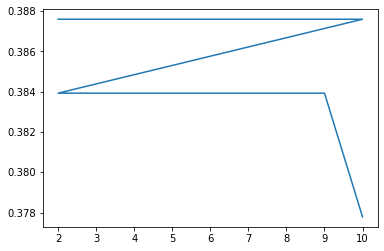

In [74]:
import matplotlib.pyplot as plt
plt.plot( result.Topics , result.Coherence)

In [75]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.61)

In [76]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.004409 -0.080303       1        1  18.220576
9     -0.056660 -0.027916       2        1  15.269717
2     -0.072956  0.043891       3        1  14.664725
8      0.036212  0.011401       4        1   9.133933
1      0.015202  0.009681       5        1   8.465215
5      0.008317  0.012053       6        1   7.730821
0      0.024512  0.005832       7        1   6.997200
6      0.010318  0.006306       8        1   6.995064
7      0.022451  0.013593       9        1   6.342695
4      0.017013  0.005462      10        1   6.180054, topic_info=        Term       Freq      Total Category  logprob  loglift
112     xbox  84.000000  84.000000  Default  30.0000  30.0000
103  trailer  25.000000  25.000000  Default  29.0000  29.0000
124     like  38.000000  38.000000  Default  28.0000  28.0000
39      game  53.000000  53.000000  Default  27.0000  27.0000
43     games  68.000000  68.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
123    keanu   0.916355  12.788373  Topic10  -6.2148   0.1480
639     song   0.655526   7.621100  Topic10  -6.5497   0.3306
43     games   1.747965  68.860857  Topic10  -5.5690  -0.8898
124     like   1.196866  38.217946  Topic10  -5.9477  -0.6798
112     xbox   0.683819  84.100332  Topic10  -6.5075  -2.0282

[511 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1716      6  0.322044    absent
135       5  0.485962    action
313       3  0.126937  actually
313       4  0.126937  actually
313       7  0.380811  actually
...     ...       ...       ...
120       2  0.251042       yet
120       3  0.251042       yet
120       6  0.251042       yet
120       8  0.125521       yet
1063      5  0.313443   youtube

[809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 3, 9, 2, 6, 1, 7, 8, 5])